In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/home/im1324/Coursera/dataset/kc_house_data.csv")

# Display data types
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# Drop "id" and "Unnamed: 0" columns (even if "Unnamed: 0" is not present, this avoids an error)
df.drop(columns=["id", "Unnamed: 0"], axis=1, inplace=True, errors='ignore')

# Display statistical summary
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Count unique floor values and convert to a DataFrame
floor_counts = df['floors'].value_counts().to_frame()

# Optional: rename the column for clarity
floor_counts.rename(columns={'floors': 'count'}, inplace=True)

# Display the result
floor_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


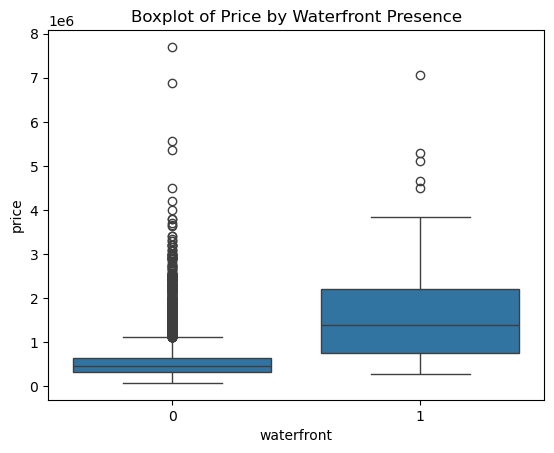

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x='waterfront', y='price', data=df)

# Add a title (optional for clarity)
plt.title("Boxplot of Price by Waterfront Presence")

# Show the plot
plt.show()


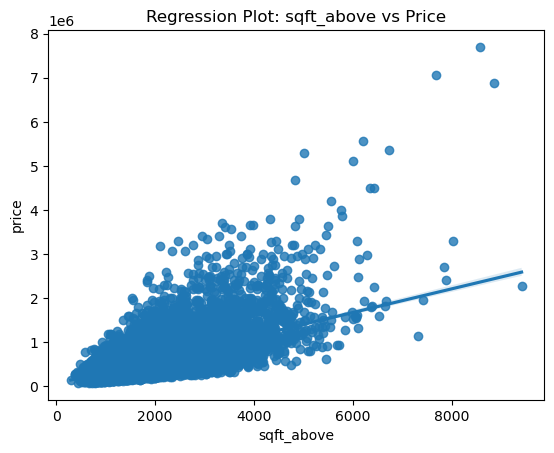

In [7]:
# Regression plot
sns.regplot(x='sqft_above', y='price', data=df)

# Add a title (optional for clarity)
plt.title("Regression Plot: sqft_above vs Price")

# Show the plot
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression

# Define feature and target
X = df[['sqft_living']]
Y = df['price']

# Create and fit the model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate and display R^2
print("R^2 score:", lm.score(X, Y))


R^2 score: 0.4928532179037931


In [10]:
# Drop rows with missing values in X or Y
X = df[features]
Y = df['price']

# Combine X and Y, then drop missing rows
data = pd.concat([X, Y], axis=1).dropna()

# Separate again
X_clean = data[features]
Y_clean = data['price']

# Fit the model
lm = LinearRegression()
lm.fit(X_clean, Y_clean)

# Print R² score
print("R^2 score (multiple features):", lm.score(X_clean, Y_clean))


R^2 score (multiple features): 0.6577283027538932


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define features and target (fill missing values if needed)
X = df[features].fillna(df[features].mean())
Y = df['price']

# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Fit the pipeline
pipe.fit(X, Y)

# Print R² score
print("R^2 score (Pipeline with Polynomial Features):", pipe.score(X, Y))


R^2 score (Pipeline with Polynomial Features): 0.7512134265289405


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Fill missing values
X = df[features].fillna(df[features].mean())
Y = df['price']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Create Ridge model
ridge_model = Ridge(alpha=0.1)

# Fit the model on training data
ridge_model.fit(X_train, Y_train)

# Print R² on test data
print("R^2 score (Ridge Regression, alpha=0.1):", ridge_model.score(X_test, Y_test))


R^2 score (Ridge Regression, alpha=0.1): 0.6460248326303513


In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Select and clean data
X = df[features].fillna(df[features].mean())
Y = df['price']

# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Apply 2nd-degree polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit Ridge model
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, Y_train)

# Print R² score
print("R^2 score (Polynomial + Ridge, alpha=0.1):", ridge_poly.score(X_test_poly, Y_test))


R^2 score (Polynomial + Ridge, alpha=0.1): 0.7546133765639904
